In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [2]:
def Maslov_model(N, buy_sell_param, qlo, bid_limit_orders, ask_limit_orders, initialPrice):
    prices=[initialPrice]
    for i in range(N):
        u = random.uniform()
        if u<=buy_sell_param: #Buyer - BID
            v = random.uniform()
            if v>qlo and ask_limit_orders:#Market_bid
                price = ask_limit_orders.pop(0)
                prices.append(price)
            else: #Limit_bid
                delta = random.uniform(0,4)
                order = max(prices[-1]-delta,0)
                bid_limit_orders.append(order)
                bid_limit_orders.sort()
                prices.append(prices[-1])
        else: #Seller - ASK
            v = random.uniform()
            if v>qlo and bid_limit_orders:#Market_ask
                price = bid_limit_orders.pop()
                prices.append(price)
            else: #Limit_ask
                delta = random.uniform(0,4)
                order = prices[-1]+delta
                ask_limit_orders.append(order)
                ask_limit_orders.sort()
                prices.append(prices[-1])
        #print("ask_limit_orders sep %i" %i, ask_limit_orders)
        #print("bid_limit_orders sep %i" %i, bid_limit_orders)
    return prices


In [3]:
from collections import OrderedDict

## Expiration time for each limit order is added
## list of orders are dictionaries


def Maslov_expiration_model(N, buy_sell_param, qlo, bid_limit_orders, ask_limit_orders, initialPrice, expiration_time):
    prices=[initialPrice]
    times = [expiration_time] * 10
    bid_expiration_times = {i: times[i] for i in range(10)}
    ask_expiration_times = {i: times[i] for i in range(10)}
    number_bid = 10
    number_ask = 10
    for i in range(N):
        bid_times_to_delete = []
        ask_times_to_delete = []
        for key, time in bid_expiration_times.items():
            if time < i:
                try:
                    del bid_limit_orders[key]
                except KeyError:
                    print("pb")
                bid_times_to_delete.append(key)
        for key, time in ask_expiration_times.items():
            if time < i:
                try:
                    del ask_limit_orders[key]
                except KeyError:
                    print("pb")  
                ask_times_to_delete.append(key)
        for key in bid_times_to_delete:
            del bid_expiration_times[key]
        for key in ask_times_to_delete:
            del ask_expiration_times[key]
        u = random.uniform()
        if u<=buy_sell_param: #Buyer - BID
            v = random.uniform()
            if v>qlo and ask_limit_orders:#Market_bid
                index = next(iter(ask_limit_orders))
                price = ask_limit_orders[index]
                del ask_limit_orders[index]
                del ask_expiration_times[index]
                prices.append(price)
            else: #Limit_bid
                delta = random.uniform(0,4)
                order = max(prices[-1]-delta,0)
                bid_limit_orders[number_bid] = order
                bid_expiration_times[number_bid] = (expiration_time + i)
                bid_limit_orders = sort_dict(bid_limit_orders)
                prices.append(prices[-1])
                number_bid += 1
        else: #Seller - ASK
            v = random.uniform()
            if v>qlo and bid_limit_orders:#Market_ask
                index = list(bid_limit_orders.items())[-1][0]
                price = bid_limit_orders[index]
                del bid_limit_orders[index]
                del bid_expiration_times[index]
                prices.append(price)
            else: #Limit_ask
                delta = random.uniform(0,4)
                order = prices[-1]+delta
                ask_limit_orders[number_ask] = order
                ask_expiration_times[number_ask] = (expiration_time + i)
                ask_limit_orders = sort_dict(ask_limit_orders)
                prices.append(prices[-1])
                number_ask += 1
        #print("ask_limit_orders sep %i" %i, ask_limit_orders)
        #print("bid_limit_orders sep %i" %i, bid_limit_orders)
    return prices

def sort_dict(dict):
    ordered_dict = OrderedDict(sorted(dict.items(), key=lambda x: x[1]))
    return ordered_dict
    

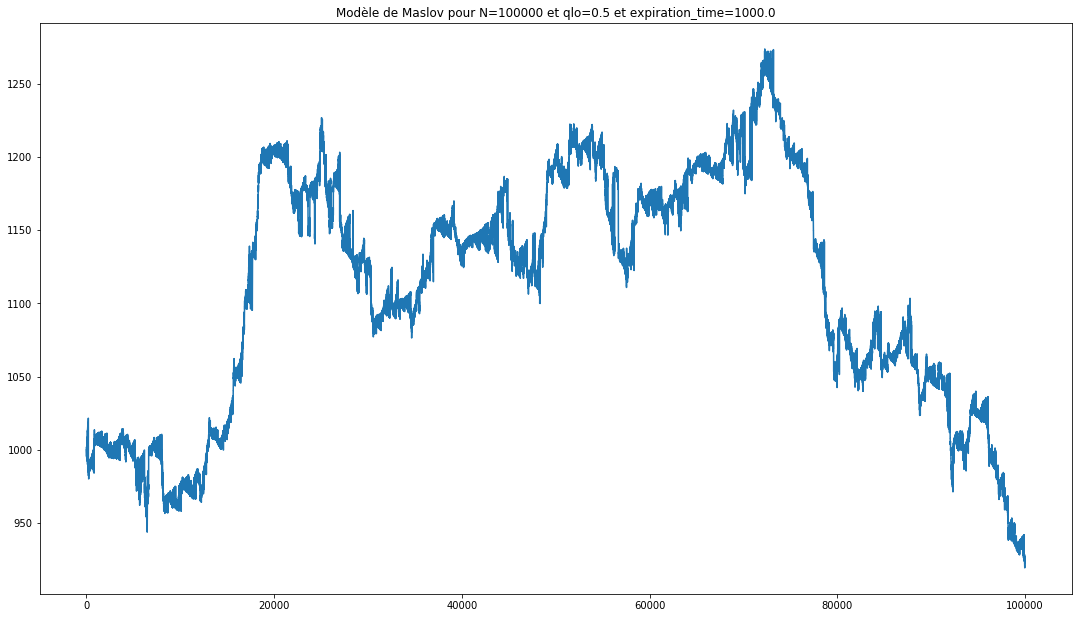

In [4]:
N = 100000
buy_sell_param = 0.5
qlo = 0.5
bids = np.linspace(990,999,10).tolist()
asks = np.linspace(1001,1010,10).tolist()
ask_limit_orders = {i: asks[i] for i in range(10)}
bid_limit_orders = {i: bids[i] for i in range(10)}
initialPrice = 1000
expiration_time = 1000
prices = Maslov_expiration_model(N,buy_sell_param,qlo,bid_limit_orders, ask_limit_orders, initialPrice, expiration_time)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 
plt.plot(range(N+1),prices)
plt.title("Modèle de Maslov pour N=%i et qlo=%.1f et expiration_time=%.1f" %(N,qlo,expiration_time))
plt.show()

(-5, 5)

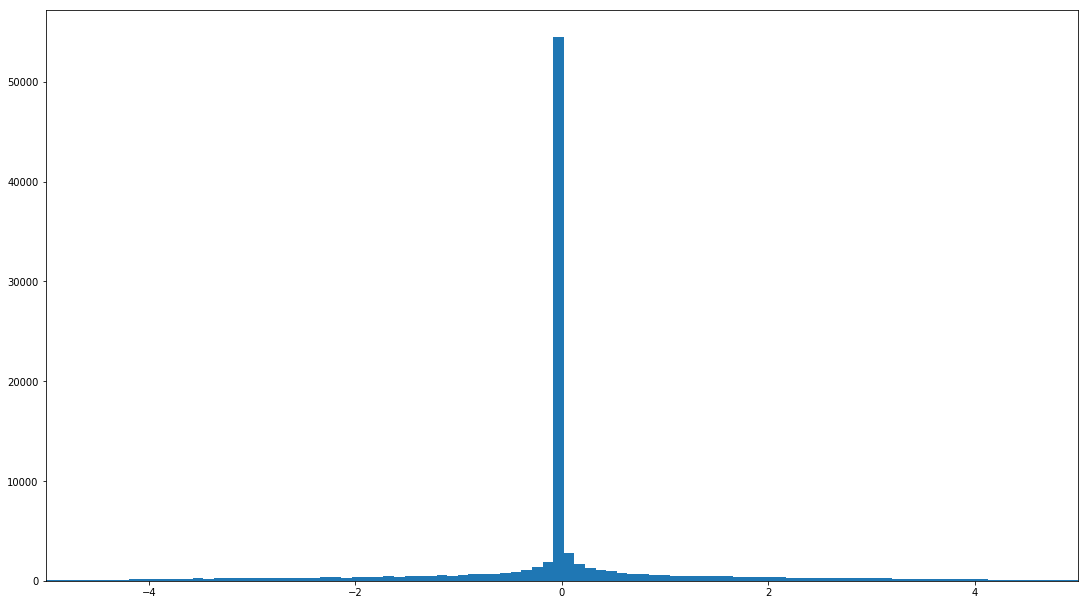

In [5]:
##Dsitribution of p(t + time_lag) - p(t) 
import seaborn as sns
import matplotlib.pyplot as plt

time_lag = 1
x = []
for t in range(N):
    if t + time_lag < N:
        x.append(prices[t + time_lag] - prices[t])

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 
plt.hist(x, bins = 1000)
plt.xlim(-5, 5)

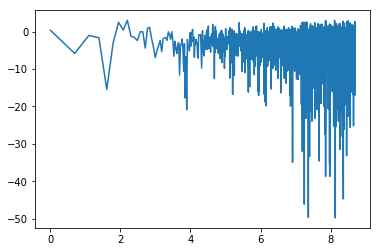

In [6]:
def log(x):
    y = []
    for i in range(len(x) - 1):
        if x[i] > 0 and x[i + 1] > 0:
            y.append(math.log(x[i + 1]) - x[i])
    return y

y = log(x)
t = [math.log(n) for n in range(1, len(y) + 1)]
plt.plot(t, y)
plt.show()

In [32]:
# Further on introduce a Maslov model with expiration time for limit orders

In [65]:
dict = {1 : 23, 2 : 45, 3 : 34}
sort_dict(dict)

OrderedDict([(1, 23), (3, 34), (2, 45)])

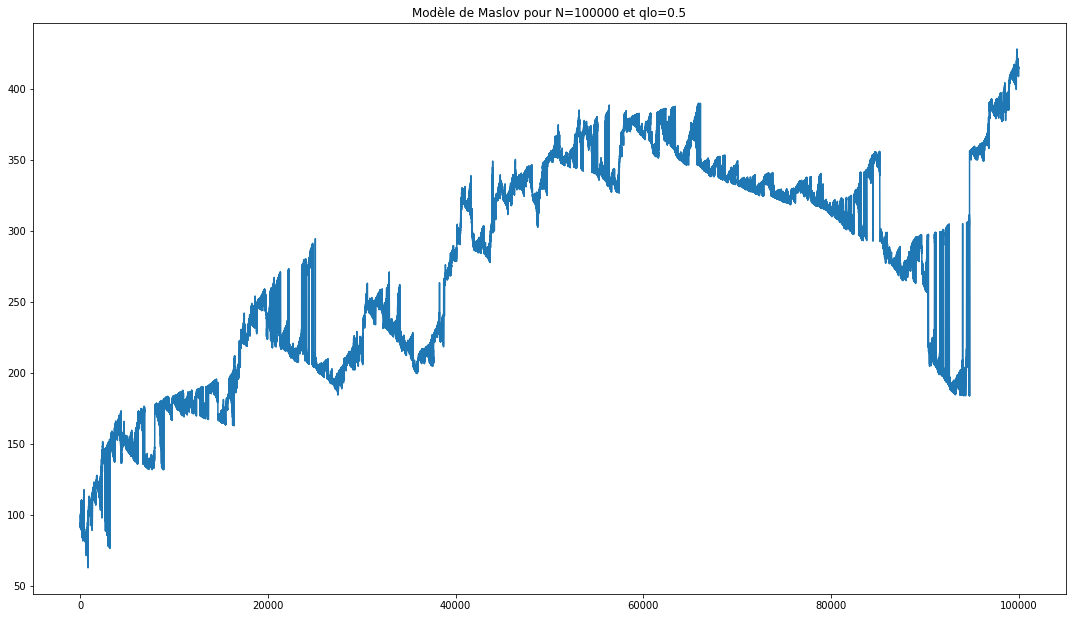

In [8]:
N = 100000
buy_sell_param = 0.5
qlo = 0.5
bid_limit_orders = np.linspace(90,99,10).tolist()
ask_limit_orders = np.linspace(101,110,10).tolist()
initialPrice = 100


prices = Maslov_model(N,buy_sell_param,qlo,bid_limit_orders, ask_limit_orders, initialPrice)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 
plt.plot(range(N+1),prices)
plt.title("Modèle de Maslov pour N=%i et qlo=%.1f" %(N,qlo))
plt.show()

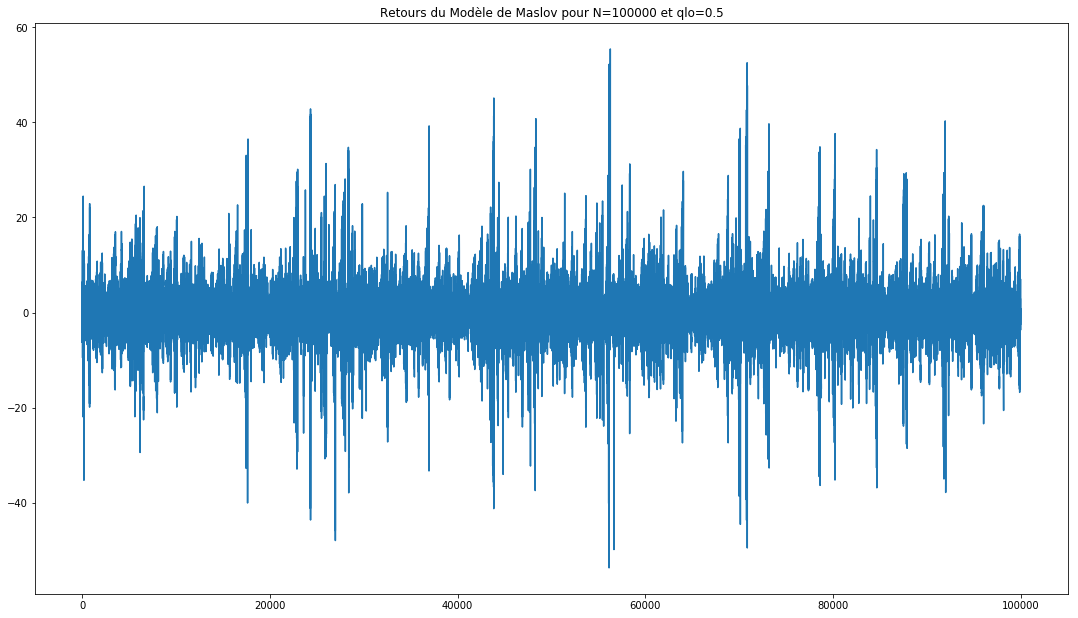

In [7]:
delta = 10
def increments(delta):
    increments = []
    i=0
    while i+delta<len(prices):
        diff = prices[i+delta]-prices[i]
        increments.append(diff)
        i += 1
    return increments

incr = increments(10)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 
plt.plot(range(len(incr)),incr)
plt.title("Retours du Modèle de Maslov pour N=%i et qlo=%.1f" %(N,qlo))
plt.show()

[-2.48982888 -2.48982888  9.43534465 ...  9.43534465 -2.48982888
 -2.48982888]


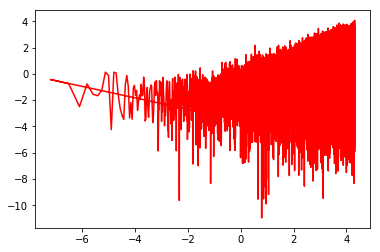

In [49]:
import scipy
from scipy import signal
from numpy import fft
def correlation(x):
    return scipy.signal.correlate(x,x)

correlation = correlation(x)
print(correlation)

Fs = 150
n = len(correlation) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(math.floor(n/2))] # one side frequency range


log = lambda x: math.log(x) if x > 0 else 0

Y = np.fft.fft(correlation)/n
Y = Y[range(math.floor(n/2))]
plt.plot(list(map(log, frq)), list(map(log, abs(Y))),'r')
plt.show()




    

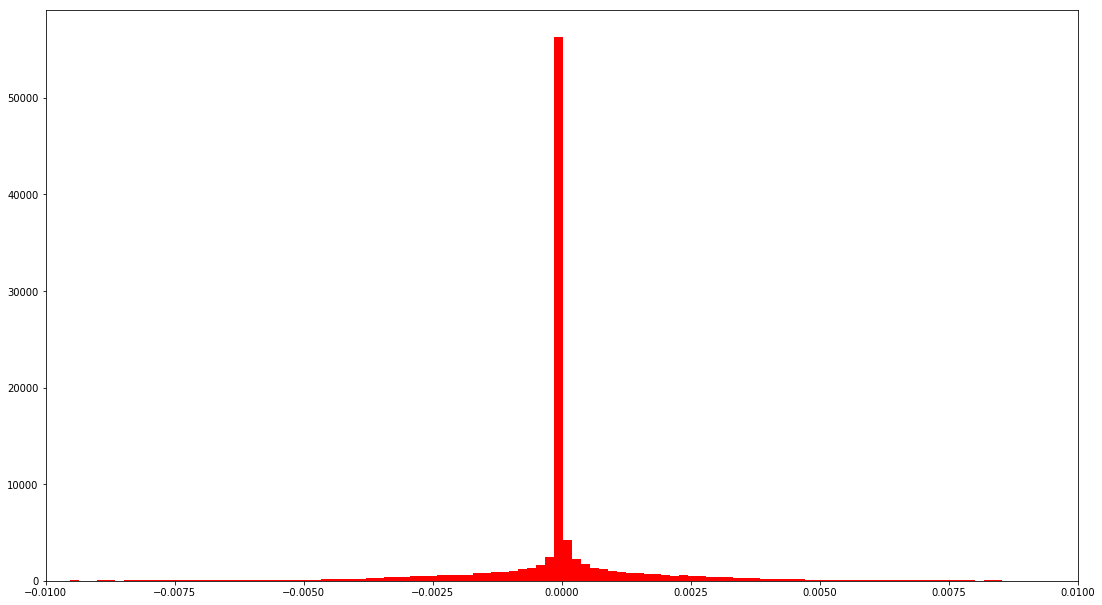

In [8]:
def log_increments(delta):
    increments = []
    i=0
    while i+delta<len(prices):
        diff = math.log(prices[i+delta])-math.log(prices[i])
        increments.append(diff)
        i += 1
    return increments

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax = plt.gca()
ax.set_xlim(-0.01,0.01)

#sns.distplot(incr, bins=500, hist=True)
plt.hist(log_increments(1), bins=500, color='r')
#plt.hist(log_increments(10), bins=500, color='b')
#plt.hist(log_increments(100), bins=500, color='g')
plt.show()
#plt.title("Distribution des retours du Modèle de Maslov pour N=%i et qlo=%.1f" %(N,qlo))
#plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


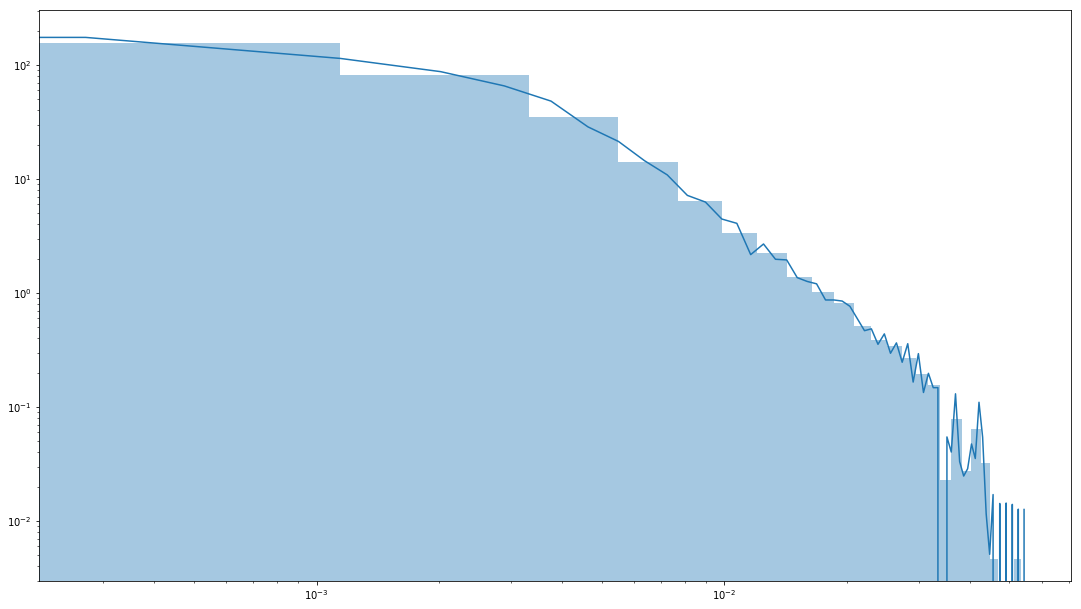

In [10]:
incr = log_increments(10)

f, ax = plt.subplots(figsize=(18.5, 10.5))
ax.set(xscale="log", yscale="log")
sns.distplot(incr, ax=ax, hist=True)

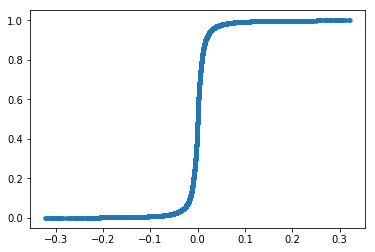

In [9]:
x = np.sort(np.array(incr))
y = np.arange(1, len(x)+1)/len(x)
plt.plot(x,y,'.', linestyle='none')
plt.show()

In [9]:
from scipy.stats import powerlaw
incrP = []
incrN = []
for l in incr:
    if l>0:
        incrP.append(l)
    elif l<0:
        incrN.append(-l)
results = powerlaw.Fit(incrP)
print(results.power_law.alpha)
print(results.power_law.xmin)
#R, p = results.distribution_compare('power_law', 'lognormal')

AttributeError: 'powerlaw_gen' object has no attribute 'Fit'

In [ ]:
results = powerlaw.Fit(incrN)
print(results.power_law.alpha)
print(results.power_law.xmin)

/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


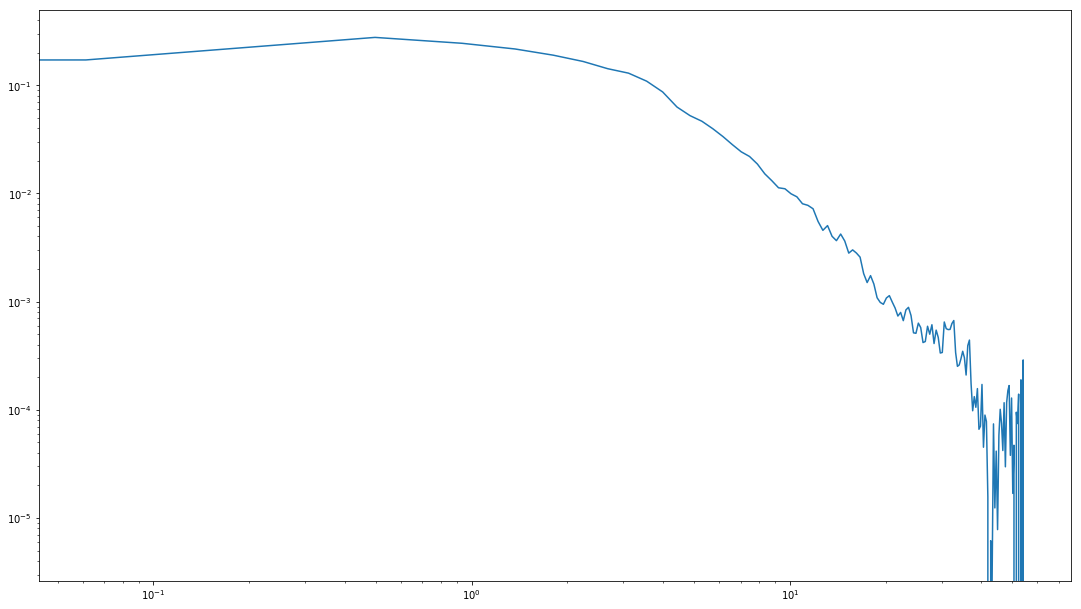

In [10]:
f, ax = plt.subplots(figsize=(18.5, 10.5))
ax.set(xscale="log", yscale="log")
sns.distplot(incrN, ax=ax, hist=False)

In [13]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
gbm = log(cumsum(randn(100000))+1000)
print(gbm)
mr = log(randn(100000)+1000)
tr = log(cumsum(randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for 
# the ADF test given above in the article
print("Hurst(GBM):   %s" %(hurst(gbm)))
print("Hurst(MR):    %s" %(hurst(mr)))
print("Hurst(TR):    %s" %(hurst(tr)))

#prices = Maslov_model(N,buy_sell_param,qlo,bid_limit_orders, ask_limit_orders, initialPrice,)
# Assuming you have run the above code to obtain 'goog'!
print("Hurst(Maslov):  %s" %(hurst(prices)))

[6.90707119 6.90808319 6.90800893 ... 6.46357413 6.46445173 6.46697491]
Hurst(GBM):   0.49333430427527686
Hurst(MR):    -0.00023716751006540461
Hurst(TR):    0.954539284690898
Hurst(Maslov):  0.25800854947601415


In [ ]:
print("===  Loading Data ===")

apple_address = "apple.csv"
apple_pd = pd.read_csv(apple_address, header=0)
apple_matrix = apple_pd.as_matrix()
print("Hurst(Apple):  %s" %(hurst(apple_pd['Adj Close'])))

In [ ]:
#results = powerlaw.Fit(y)
#print(results.power_law.alpha)
#print(results.power_law.xmin)
powerlaw.plot_ccdf(incrN, color='b')
plt.show()

In [12]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel

In [13]:

def product_sign(t):
    signs = []
    for t_prim in range(N):
        if t_prim + t + 1 < N:
            sign = (np.sign(prices[t_prim + t + 1] - prices[t_prim + t]) * np.sign(prices[t_prim + 1] - prices[t_prim]))
            signs.append(sign)
    return signs
        

In [ ]:
autocorrelation_sign_functions = []

for t in range(N):
    sign_temp_mean = np.mean(product_sign(t))
    autocorrelation_sign_functions.append(sign_temp_mean)

x = np.linspace(0, 1 * 0.5, N * 0.5)
plt.plot(x, scipy.fftpack.fft(autocorrelation_sign_functions))
plt.title("Autocorrelation function of the absolute value of price increments")
plt.show()

In [ ]:
autocorrelation_abs_value_functions = []

def product_abs(t):
    products = []
    for t_prim in range(N):
        if t_prim + t + 1:
            term1 = math.fabs(np.sign(prices[t_prim + t + 1] - prices[t_prim + t]))
            term2 = math.fabs(np.sign(prices[t_prim + 1] - prices[t_prim]))
            products.append(term1 * term2)
    return products

for t in range(N):
    abs_value_mean = np.mean(product_abs(t))
    autocorrelation_abs_value_functions.append(abs_value_mean)

x = np.linspace(0, 1 * 0.5, N * 0.5)
plt.plot(x, scipy.fftpack.fft(autocorrelation_abs_value_functions))
plt.title("Autocorrelation function of signs of price increments")
plt.show()
    

In [ ]:
def mean(series):
    m = 0
    for p in series:
        m += p
    m = m / len(series)
    return m

def hurst_exponent(series):
    m = mean(series)
    
    adjusted_series = [0] * len(series)
    progressive_means = [0] * len(series)
    cumulative_deviate_series = [0] * len(series)
    range_series = [0] * len(series)
    standard_deviation_series = [0] * len(series)
    rescaled_range_series = [0] *len(series)
    for t in range(len(series)):
        adjusted_series[t] = series[t] - m
        temp = 0
        progressive_means[t] = mean(series[:t+1])
        for t_prim in range(t + 1):
            cumulative_deviate_series[t] += adjusted_series[t_prim]
            temp += (series[t_prim] - progressive_means[t]) ** 2
        range_series[t] = max(cumulative_deviate_series[:t + 1]) - min(cumulative_deviate_series[:t + 1])
        standard_deviation_series[t] = math.sqrt(temp / (t + 1))
        if standard_deviation_series[t] != 0:
            rescaled_range_series[t] = range_series[t] / standard_deviation_series[t]
    
    return rescaled_range_series

     

In [ ]:
x = range(1, N + 1)
y = hurst_exponent(prices)
plt.plot(x, math.log(10, y))
plt.title("Hurst exponent of price series")
plt.show()